# Initiation

In [1]:
from atmPy.data_archives.arm import read_data
from atmPy.general import timeseries
from hagpack.projects.arm import my_products
import os

In [2]:
%matplotlib inline

In [3]:
def get_other_filenames(filename, others, all_files, verbose = False):
    out_dict = {}
#     print('fname_tdmaapssize :', filename)
    fname_split = os.path.split(filename)[-1].split('.')
    site = fname_split[0][:3]
#     folder = os.path.split(filename)[0]
#     print(folder)
    date = fname_split[-3]
#     print('date: ', date)
    all_that_day = all_files[np.char.find(all_files, date) > -1]

    for prod in others:
        fname = all_that_day[np.char.find(all_that_day, prod) > -1]
        if fname.shape[0] != 1:
            if verbose:
                print('no corresponding aosacsm found ... continue on %s'%date)
            return False

        else:
#             print(prod,  fname[0])
            out = {'fname': fname[0]}
            out_dict[prod] = out
    out_dict['date']= date
#     out_dict['folder'] = folder
    out_dict['site'] = site
    return out_dict
    

# All

In [7]:
product = my_products.tdmaaps2scatteringcoeff_RI1o5_1um_550nm()
# product.calculate_new()
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RI1o5_1um_550nm.20141112.000000.cdf


In [8]:
product = my_products.tdmaaps2scatteringcoeff_RIaosacsm_1um_550nm()
# product.calculate_new()
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RIaosacsm_1um_550nm.20141112.000000.cdf


In [9]:
product = my_products.tdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_bad()
# product.calculate_new()
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_bad.20141112.000000.cdf


In [10]:
product = my_products.tdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_good()
# product.calculate_new()
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_good.20141112.000000.cdf


In [11]:
product = my_products.sgpaipfitrh2kappa_RH_85_40_tdmaapssize_RI1o5_1um_550nm_patchy()
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgpaipfitrh2kappa_RH_85_40_tdmaapssize_RI1o5_1um_550nm_patchy.20141231.000000.cdf


In [7]:
product = my_products.sgptdmahyg2kappa_avg_d200_patchy(test = False)
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmahyg2kappa_avg_d200_patchy.20141112.000000.cdf


In [12]:
# product = my_products.tdmaaps_tdmahyg_aosacsm2fofrh_1um_hyg400_rh85v40()
# product.calculate_new()

# f(RH) from tdmahyg and tdmaapssize

In [ ]:
product = my_products.tdmaaps_tdmahyg_aosacsm2fofrh_1um_hyg400_rh85v40
product.test = True
product.calculate_all()

In [10]:
product.result.plot()

# Kappa from aipfitrh

In [4]:
out = my_products.sgpaipfitrh2kappa_RH_85_40_tdmaapssize_RI1o5_1um_550nm_patchy(test=True)
out.calculate_all()

# Kappa from tdmahy

In [4]:
prod = my_products.sgptdmahyg2kappa_avg_d200_patchy(test = True)

# Kappa from acsm

In [11]:
fname = '/Users/htelg/data/ARM/SGP/sgpaosacsmC1.b1.20120301.001222.cdf'

In [12]:
out = read_data.read_cdf(fname, data_quality= 'patchy')

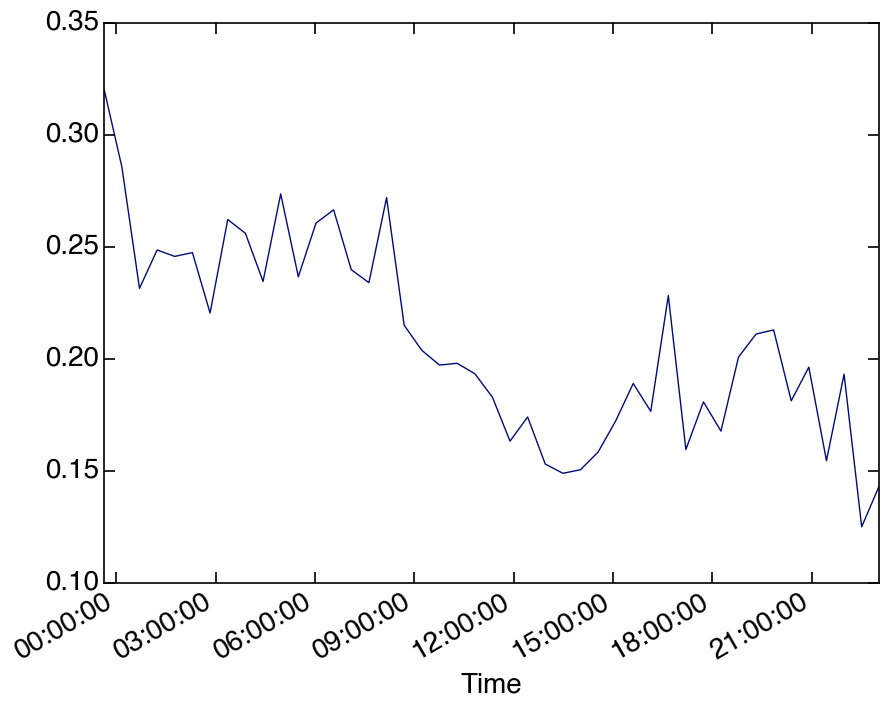

In [13]:
out.kappa.plot()

# mass from tdmaapssize and aosacsm

In [ ]:
class TdmaapsAosacsm2massconcentration(object):
    def __init__(self, data_quality = 'patchy',
        diameter_cutoff='1um',
        folder_out = '/Users/htelg/data/ARM/myproducts/SGP/',
        folder = '/Users/htelg/data/ARM/SGP/'):
        
        self.data_quality = data_quality
        self.diameter_cutoff= diameter_cutoff
        self.folder_out = folder_out
        self.folder = folder
        
    def _calculate_one(self, tdmaapssize, aosacsm, diameter_cutoff):
        if diameter_cutoff == '1um':
            dcoff = 1000
        elif diameter_cutoff == '10um':
            dcoff = 10000

        dist = tdmaapssize.size_distribution.zoom_diameter(end = dcoff)
        dist.physical_property_density = aosacsm.density
        pmc = dist.particle_mass_concentration
        return pmc
    
    def calculate_new(self, time_window = False, verbose = False):
        self._calculate_all(False)
        
    def calculate_all(self, time_window = False, verbose = False):
        self._calculate_all(True)
        
    def _calculate_all(self, overwrite, time_window = False, verbose = False):
        mass_conc_list = []
        all_files = os.listdir(self.folder)
        all_files = np.array(all_files)

        all_files_tdmaapssize = all_files[np.char.find(all_files, 'tdmaapssize') > -1]

        for e,fname_tdmaapssize in enumerate(all_files_tdmaapssize):
        #             print(fname_tdmaapssize)
            if time_window:
                if not atm_arm._is_in_time_window(fname_tdmaapssize, verbose):
                    continue

            fname_others = get_other_filenames(fname_tdmaapssize, ['aosacsm'], all_files)
            if not fname_others:
                continue

            name_addon = '%s'%(self.diameter_cutoff)
            my_prod_name = self.folder_out + '/' + fname_others['site'] + '_HT_tdmaapsmass_' + name_addon + '.' + fname_others['date'] + '.000000.cdf'

            if not overwrite:
                if os.path.isfile(my_prod_name):
                    if verbose:
                        print('product %s already exists'%my_prod_name)
                    continue
            verbose = False
            tdmaapssize = read_data.read_cdf(self.folder + fname_tdmaapssize, data_quality = self.data_quality, verbose = verbose)
            aosacsm = read_data.read_cdf(self.folder + fname_others['aosacsm']['fname'], data_quality= self.data_quality, verbose = verbose)

            mass_conc = self._calculate_one(tdmaapssize, aosacsm, diameter_cutoff=self.diameter_cutoff)

            mass_conc_list.append(mass_conc)
            mass_conc.save_netCDF(my_prod_name)

        print(my_prod_name)
        mass_conc_cat  = timeseries.concat(mass_conc_list)
        self.mass_conc_concat = mass_conc_cat.close_gaps(verbose=False)


In [ ]:
HT_tdmaapsmass_1um = TdmaapsAosacsm2massconcentration(data_quality='patchy', diameter_cutoff='1um')
HT_tdmaapsmass_10um = TdmaapsAosacsm2massconcentration(data_quality='patchy', diameter_cutoff='10um')

In [ ]:
HT_tdmaapsmass_10um.calculate_all()
HT_tdmaapsmass_1um.calculate_all()

In [ ]:
HT_tdmaapsmass_1um.mass_conc_concat.plot()

# scattering from tdmaaps and aosacsm

In [1]:
from hagpack.projects.arm import my_products

In [2]:
%matplotlib inline

In [15]:
reload(my_products)

<module 'hagpack.projects.arm.my_products' from '/Users/htelg/prog/hagpack/hagpack/projects/arm/my_products.py'>

In [14]:
product = my_products.Tdmaaps2scatteringcoeff(data_quality='good', 
                                              diameter_cutoff='1um', 
                                              wavelength=550, 
                                              refractive_index='aosacsm', 
                                              folder_out='/Users/htelg/data/ARM/myproducts/SGP/', 
                                              folder='/Users/htelg/data/ARM/SGP/', 
                                              test=False)
product.test = True
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_good.20120201.000000.cdf


## tdmaaps2scatteringcoeff_IRaosacsm_1um_550nm

In [8]:
product = my_products.tdmaaps2scatteringcoeff_RIaosacsm_1um_550nm()
# product.test = True
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RIaosacsm_1um_550nm.20141112.000000.cdf


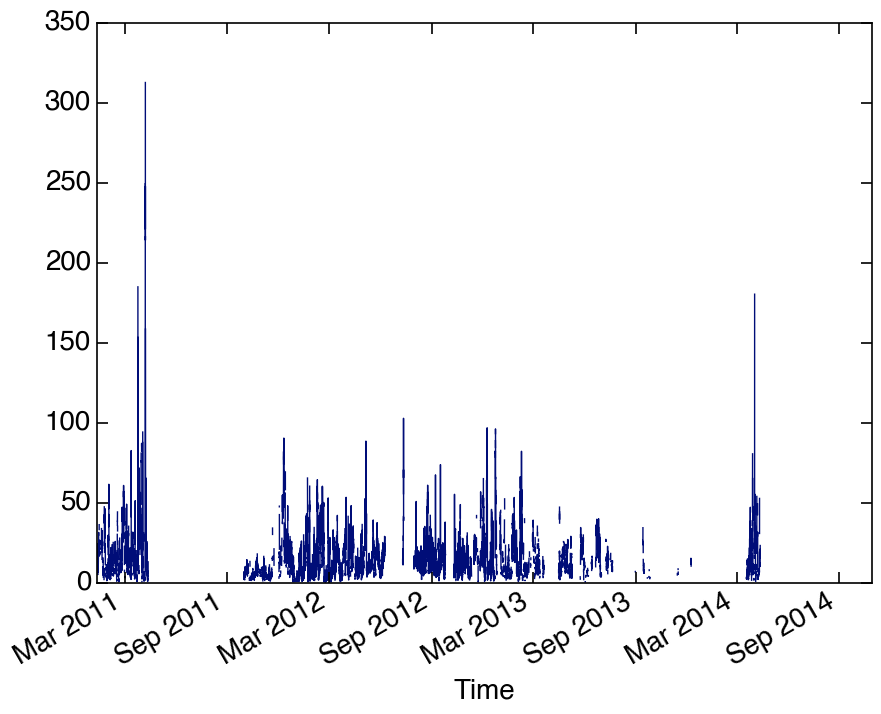

In [9]:
product.result.plot()

## tdmaaps2scatteringcoeff_IRaosacsm_1um_550nm_good

In [23]:
product = my_products.tdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_good()
# product.test = True
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_good.20141112.000000.cdf


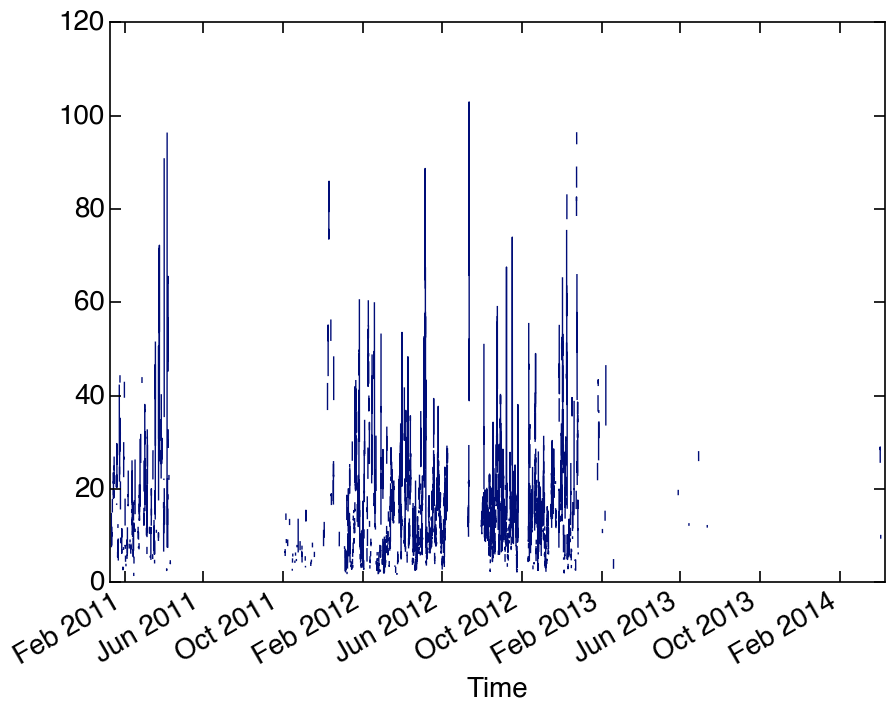

In [24]:
product.result.plot()

## tdmaaps2scatteringcoeff_IRaosacsm_1um_550nm_bad

In [25]:
product = my_products.tdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_bad()
product.test = True
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RIaosacsm_1um_550nm_bad.20120201.000000.cdf


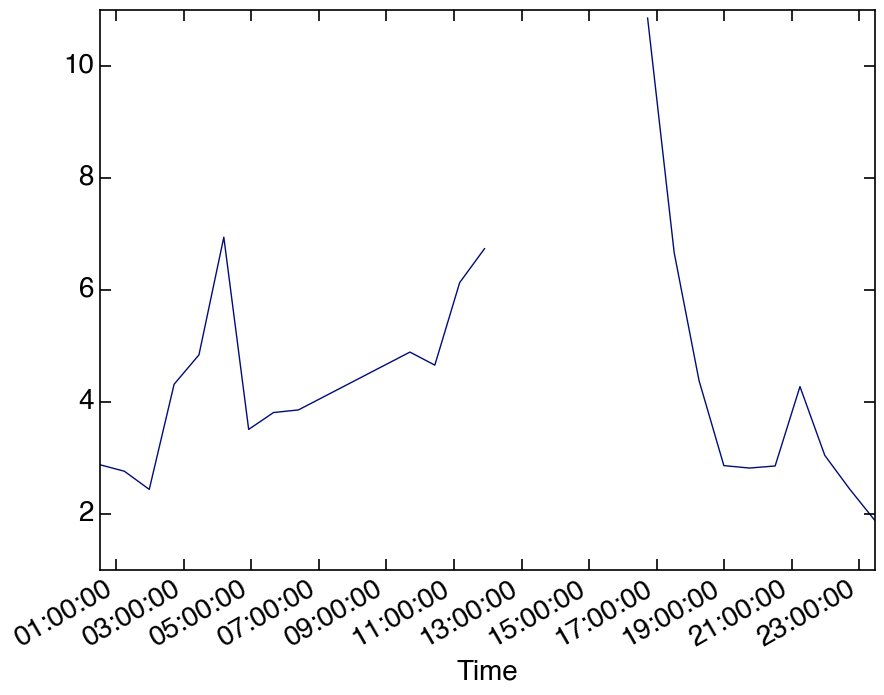

In [26]:
product.result.plot()

## tdmaaps2scatteringcoeff_RI1o5_1um_550nm

In [10]:
product = my_products.tdmaaps2scatteringcoeff_RI1o5_1um_550nm()
# product.test = True
product.calculate_all()

/Users/htelg/data/ARM/myproducts/SGP/sgptdmaaps2scatteringcoeff_RI1o5_1um_550nm.20141112.000000.cdf


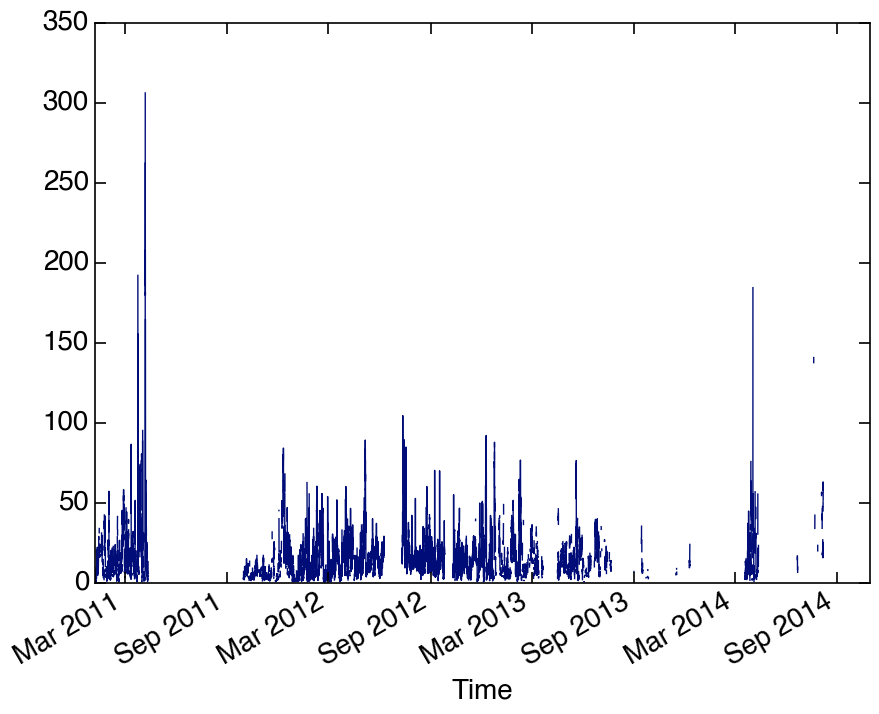

In [11]:
product.result.plot()

# hemispheric backscattering

In [ ]:
class TdmaapsAosacsm2backscattering(object):
    def __init__(self, data_quality = 'patchy',
        diameter_cutoff='1um',
        wavelength = 550, #in nm
        folder_out = '/Users/htelg/data/ARM/myproducts/SGP/',
        folder = '/Users/htelg/data/ARM/SGP/'):
        
        self.wavelength = wavelength
        self.data_quality = data_quality
        self.diameter_cutoff= diameter_cutoff
        self.folder_out = folder_out
        self.folder = folder
        
    def _calculate_one(self, tdmaapssize, aosacsm):
        if self.diameter_cutoff == '1um':
            dcoff = 1000
        elif self.diameter_cutoff == '10um':
            dcoff = 10000

        dist = tdmaapssize.size_distribution.zoom_diameter(end = dcoff)
        dist.index_of_refraction = aosacsm.refractive_index
        opt = dist.calculate_optical_properties(self.wavelength)
        backscatt = opt.hemispheric_backscattering_ratio
        backscatt.data.values[backscatt.data.values == 0] = np.nan
#         extcoeff.data *= 1e6 # conversion from inverse meter to mega meter
        return backscatt
    
    def calculate_new(self, time_window = False, verbose = False):
        self._calculate_all(False)
        
    def calculate_all(self, time_window = False, verbose = False):
        self._calculate_all(True)
        
    def _calculate_all(self, overwrite, time_window = False, verbose = False):
        overwrite = False
        time_window = False
        verbose = False

        backscatt_list = []
        all_files = os.listdir(self.folder)
        all_files = np.array(all_files)

        all_files_tdmaapssize = all_files[np.char.find(all_files, 'tdmaapssize') > -1]

        for e,fname_tdmaapssize in enumerate(all_files_tdmaapssize):
        #             print(fname_tdmaapssize)
            if time_window:
                if not atm_arm._is_in_time_window(fname_tdmaapssize, verbose):
                    continue

            fname_others = get_other_filenames(fname_tdmaapssize, ['aosacsm'], all_files)
            if not fname_others:
                continue

            name_addon = '%s_%snm'%(self.diameter_cutoff, self.wavelength)
            my_prod_name = self.folder_out + fname_others['site'] + '_HT_tdmaapsbackscatt_' + name_addon + '.' + fname_others['date'] + '.000000.cdf'

            if not overwrite:
                if os.path.isfile(my_prod_name):
                    if verbose:
                        print('product %s already exists'%my_prod_name)
                    continue
            verbose = False
            tdmaapssize = read_data.read_cdf(self.folder + fname_tdmaapssize, data_quality = self.data_quality, verbose = verbose)
            aosacsm = read_data.read_cdf(self.folder + fname_others['aosacsm']['fname'], data_quality= self.data_quality, verbose = verbose)

            backscatt = self._calculate_one(tdmaapssize, aosacsm)

            backscatt_list.append(backscatt)
            backscatt.save_netCDF(my_prod_name)
            
        print(my_prod_name)
        backscatt_cat  = timeseries.concat(backscatt_list)
        self.backscattf_cat = backscatt_cat.close_gaps(verbose=False)


In [ ]:
HT_tdmaapsbackscatt_1um_550nm = TdmaapsAosacsm2backscattering()

In [ ]:
HT_tdmaapsbackscatt_1um_550nm.calculate_new()

In [ ]:
tmp.backscattf_cat.plot()

# Loading data

In [ ]:
from atmPy.data_archives.arm import read_data as atm_arm

In [ ]:
from hagpack.projects.arm import my_products

In [ ]:
reload(my_products)

In [ ]:
my_products.products

In [ ]:
folder = '/Users/htelg/data/ARM/myproducts/SGP/'
time_window = ('2011-10-01', '2012-01-01')
prod_name = 'HT_tdmaapshyg_1um_hyg400_rh85v40'
site = 'sgp'

In [ ]:
out = my_products.check_availability(folder,prod_name, time_window=time_window )

In [ ]:
ts_concat = my_products.load_netCDF(folder, prod_name, time_window)

In [ ]:
ts_concat.plot()

In [ ]:
def load_netCDF(folder, prod_name, time_window, site = 'sgp', verbose = False):
    all_files = os.listdir(folder)

    all_ts = []
    verbose = False
    for file in all_files:
        if not atm_arm._is_in_time_window(file, time_window, verbose):
            continue

        site_check = atm_arm._is_site(file,site,verbose)
        if not site_check:
            continue
        ts = timeseries.load_netCDF(folder + file)
        all_ts.append(ts)
    #     print('found one: ', folder + file)

    ts_concat = timeseries.concat(all_ts)
    ts_concat.data.sort_index(inplace=True)
    return ts_concat

In [ ]:
ts_concat = load_netCDF(folder, prod_name, time_window)

In [ ]:
ts_concat.plot()